<a href="https://colab.research.google.com/github/VolkiTheDreamer/PythonRocks/blob/master/Machine%20Learning/Reinforcement%20Learning/Gym_FrozenLake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Son güncelleme tarihi:27.03.2025**

**UYARI:** Öncelikle https://gymnasium.farama.org/introduction/basic_usage/ ve https://gymnasium.farama.org/environments/toy_text/frozen_lake/ sayfalarından environment'ı ve genel gym kullanımını inceleyin, ama mutlaka inceleyin. Bunu bir tavsiye olarak değil zorunluluk görün lütfen. Oradaki bilgileri burada aynen tekrar etmek istemediğim için buraya almadım, ve bunları okumazsanız burada anlatacaklarımı anlayacağınızı sanmıyorum.

# Imports

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
!pip -q install ipython-autotime
%load_ext autotime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.0 MB/s eta 0:00:00
time: 832 µs (started: 2025-04-06 11:12:09 +00:00)


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=ImportWarning)

time: 1.29 ms (started: 2025-04-06 11:12:09 +00:00)


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

time: 1.1 ms (started: 2025-04-06 11:12:09 +00:00)


gymnasium'u kuralım (sadece frozen-lake environemnt'ı yeterli)

In [ ]:
!pip -q install "gymnasium[frozen-lake]"

time: 6.84 s (started: 2025-04-06 11:12:09 +00:00)


In [ ]:
import gymnasium as gym
env = gym.make('FrozenLake-v1', render_mode='rgb_array', is_slippery=False) #Önce basit başlıyoruz, göl kaygan olmasın. Yani stokastik bir yapıyla başlamıyoruz, onu sonra ele alacğaız

time: 559 ms (started: 2025-04-06 11:12:16 +00:00)


# Modelleme

## Intro

Bir environment'ın en önemli özellikleri action ve state space idi, bunlara bakalım

In [ ]:
env.action_space # 4 yön

Discrete(4)

time: 4.05 ms (started: 2025-04-06 11:12:17 +00:00)


In [ ]:
env.observation_space #state space , 16 hücre

Discrete(16)

time: 3.12 ms (started: 2025-04-06 11:12:17 +00:00)


Başka birkaç özelliğe daha bakalım

In [ ]:
env.metadata

{'render_modes': ['human', 'ansi', 'rgb_array'], 'render_fps': 4}

time: 2.96 ms (started: 2025-04-06 11:12:17 +00:00)


In [ ]:
env._max_episode_steps # bu kadar hamle sonunda sonuçlanmazsa ilgili tur/episode yarıda kesilecek

100

time: 5.69 ms (started: 2025-04-06 11:12:17 +00:00)


In [ ]:
env.render_mode

'rgb_array'

time: 2.78 ms (started: 2025-04-06 11:12:17 +00:00)


Environemnt'ta iki önemli metod vardır. ilki, oyuna başlama metodu olan **reset**. ikincisi action space'ten bir action icra eden **step**'tir.

In [ ]:
env.reset()

(0, {'prob': 1})

time: 8.01 ms (started: 2025-04-06 11:12:17 +00:00)


Bu metod, eski versiyonlarda sadece observation bilgisi döndürürken şimdi iki değerli bir tuple döndürüyor. Bu arada bu tür kütüphane versiyon değişimlerini sıklıkla gözlemleyeceksiniz, eminim bu durum diğer kütüphanelerden de bildiğiniz bir durumdur. O yüzden internette bulduğunuz ve hatta Chatgpt gibi LLM araçlarına ürettirdiğiniz kodları kullanırken dikkatli olmanızda fayda var.

Şimdi bu tuple'ın ilk elemanı observation(state bilgisi oluyor) iken ikincisi bir info nesnesidir. Observation: 16 hücreden kaçıncı hücrede olduğumuz bilgisi, info ise bir sonraki hücreye geçme olasılığımızdır, ki slippery(stokastik) modda olmadığımız için bu hep 1(%100) olacaktır.

In [ ]:
#şimbi bunları bi dğeişkene atayalım
observation, info = env.reset()

time: 1.14 ms (started: 2025-04-06 11:12:17 +00:00)


Bir diğer önemli metod da oyunun o anki durumunu görsel olarak bize gösteren **render** metodudur.

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
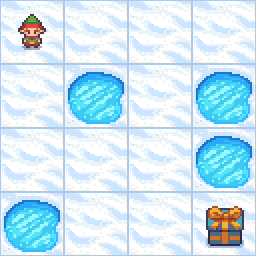

time: 907 ms (started: 2025-04-06 11:12:17 +00:00)


In [ ]:
env.render() #oyun haritasını gösterir, sağ üstteki show data/hide date ile toggle yapabilrsiniz

Şimdi oyunumuzu oynamaya başlayalım. Öncelikle, hiçbir öğrenme olmadan bu oyun alanında nasıl hareket ediyoruz, onu bi içselleştirelim yani gym'e ısınalım istiyorum.

### Alternatif konfigürasyonlar

Öncesinde, environment'ın farklı konfigürasyonları olabileceğinden bahsetmek isterim. Mesela **is_slippery=True** deyince stokastik bir yapıya sahip olur, siz ileri gitmek istersiniz ama zemin kaygan ya, yana gidebilirsiniz; bunun da olasılığı 1/3'tür. Bu modda doğal olarak öğrenim süresi de artacaktır (detayları aşağıda göreceğiz)

Ayrıca, harita büyüklüğünü 4x4 yerine 8x8 de yapabiliyoruz.

In [ ]:
env8 = gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=True, render_mode="rgb_array")

time: 2.88 ms (started: 2025-04-06 11:12:18 +00:00)


(0, {'prob': 1})

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
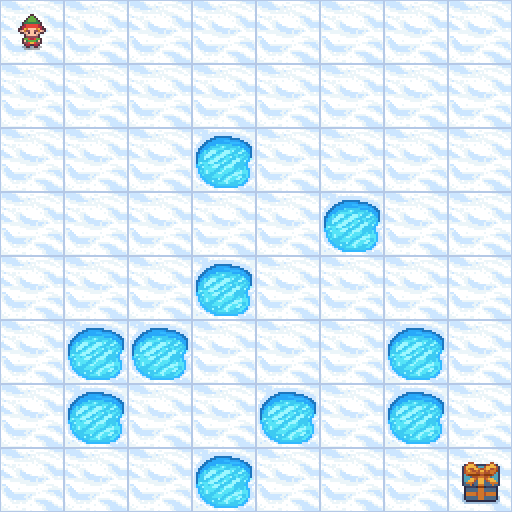

time: 31.9 ms (started: 2025-04-06 11:12:18 +00:00)


In [ ]:
env8.reset()
env8.render()

In [ ]:
env8.observation_space

Discrete(64)

time: 2.22 ms (started: 2025-04-06 11:12:18 +00:00)


### Fizik kuralları(Geçiş dinamikleri)

Şimdi de ortamın geçiş dinamiklerini(transition dynamics) temsil eden P property'sine bakalım. Bu yapı, ortamın [Markov Karar Süreci](https://en.wikipedia.org/wiki/Markov_decision_process) (MDP) modelini tanımlar ve her state ve action için olası sonuçları, olasılıkları, ödülleri ve bitiş durumlarını içerir. Bir nevi environment'ın fizik kurallarını içerir diyebilriiz. Mesela birçok environment'ta olduğu gibi burada da sınırları delmek otomatik engellenmiş durumdadır. Yani en soldayken daha sola gidemiyorsunuz, hamleniz bu yönde olsa bile, onun yerine oduğunuz yerde kalıyorsunuz.

(0, {'prob': 1})

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
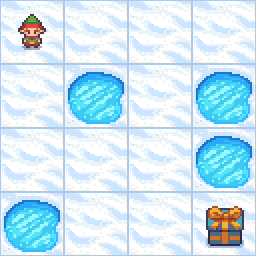

time: 20 ms (started: 2025-04-06 11:12:18 +00:00)


In [ ]:
env = gym.make('FrozenLake-v1', is_slippery=True, render_mode="rgb_array")
env.reset()
env.render()

In [ ]:
env.unwrapped.P #probability, next_state, reward, done  şeklinde değerler döner. Bunu nasıl okuyacağımız alttaki hücrede açıklayacağım

{0: {0: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  2: [(0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)],
  3: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 1: {0: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False)],
  2: [(0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  3: [(0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 2:

time: 9.9 ms (started: 2025-04-06 11:12:18 +00:00)


P nasıl okunur

```
P = {
    state: {
        action: [
            (probability, next_state, reward, done),
            ...
        ],
        ...
    },
    ...
}
```
Bunu öncelikle is_slippery=False iken yorumlayalım, sonra True için:


```
P[0], yani 0,0 hücresindeyken
   {
    0: [(1.0, 0, 0.0, False)],  # 0 eylemi, yani sola gitmeye çalışırsa, yerinde kalır, ödül 0dır, oyun bitmemiştir
    1: [(1.0, 4, 0.0, False)],  # 1 eylemi, yani aşağı gitmeye çalışırsa, state 4'e geçer, "" ""
    2: [(1.0, 1, 0.0, False)],  # 2 eylemi, yani sağa gitmeye çalışırsa, state 1'e geçer, "" ""
    3: [(1.0, 0, 0.0, False)]   # 3 eylemi, yani yukarı gitmeye çalışırsa, yerinde kalır, "" ""
   }

Bütün bunları %100 olaslıkla yapar.
```

Şimdi de slippery olma durumuna bakalım:


In [ ]:
#16 statten ilki(0) için bakalım ve nasıl okuyacağımızı görelim
env.unwrapped.P[0]

{0: [(0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 4, 0.0, False)],
 1: [(0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 4, 0.0, False),
  (0.3333333333333333, 1, 0.0, False)],
 2: [(0.3333333333333333, 4, 0.0, False),
  (0.3333333333333333, 1, 0.0, False),
  (0.3333333333333333, 0, 0.0, False)],
 3: [(0.3333333333333333, 1, 0.0, False),
  (0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 0, 0.0, False)]}

time: 2.9 ms (started: 2025-04-06 11:12:18 +00:00)




```
* 0'dayken 0 eylemini yapmaya çalışırsa 1/3 olasılıkla 0'a gider yani yerinde kalır, ödülü 0, oyun bitmez
diğeleri de yanı şekilde
```
şimdi de başka bi hücredeyken bakalım


In [ ]:
env.unwrapped.P[10] #2,1 hücresindeyken

{0: [(0.3333333333333333, 6, 0.0, False),
  (0.3333333333333333, 9, 0.0, False),
  (0.3333333333333333, 14, 0.0, False)],
 1: [(0.3333333333333333, 9, 0.0, False),
  (0.3333333333333333, 14, 0.0, False),
  (0.3333333333333333, 11, 0.0, True)],
 2: [(0.3333333333333333, 14, 0.0, False),
  (0.3333333333333333, 11, 0.0, True),
  (0.3333333333333333, 6, 0.0, False)],
 3: [(0.3333333333333333, 11, 0.0, True),
  (0.3333333333333333, 6, 0.0, False),
  (0.3333333333333333, 9, 0.0, False)]}

time: 3.24 ms (started: 2025-04-06 11:12:18 +00:00)


Bunu yorumlamayı size bırakıyorum.

## Öğrenmesiz süreç

Oyundaki en önemli metod sanırım **step** metodudur. Oyun içinde eylemlerimizi icra etmemizi sağlayan bu metod bize 5 değer döndürür(*)

1. observation ya da state: Bu, oyundaki bir sonraki state'tir(next_state). Belirli bir eylemi gerçekleştirdiğinize, o eylemin sonucunda geçilebilecek sonraki durumun sayısal gösterimidir. Unutmayalım ki her bir state'in integer bir karşılığı var, en azından gym'de böyle.

2. Ödül(reward): Belirli bir eylemi gerçekleştirdiğinizde ve belirli bir sonraki duruma geçtiğinizde alınan ödül veya cezadır. Cezalar negatif değerlidr.

3. Terminated: Belirli bir eylemi gerçekleştirdiğinizde ve belirli bir sonraki duruma geçtiğinizde, bölümün olumlu/olumsuz tamamlanıp tamamlanmadığını gösteren bir boolean değerdir (True veya False). Hedefe varırsanız da, çukura düşme,canavara yakalanma gibi yenilmenize neden olan bir eylem de olsa oyun bitmiş olur.

4. Truncated: Belirlenen maksimum hamle sonunda oyun sonlanmazsa artık devam edilmez ve son hamleden sonra True döner, yeni episode'a geçilir.

5. info/probability: Belirli bir eylemi gerçekleştirdiğinizde, o eylemin sonucunda bir sonraki duruma geçme olasılığıdır. frozen-lake oyununda is_slippery False olduğu sürece bu değer %100 yani 1'dir, True iken 1/3.

\* eskiden 4 değer idi. terminated ve truncated tek bir değer olan "done" şeklinde temsil ediliyordu.

Şimdi en basit haliyle, yani random bir action seçtiğimiz haliyle oyunu başlatalım. Rasgelelik, öğrenme olmama durumunu temsil ediyor. Gerekli açıklamalar comment olarak yanlarına yazılmıştır.

(0, {'prob': 1})

Agentımız 2(sağ) yönüne gidecek

0 0.0 False False {'prob': 0.3333333333333333}


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
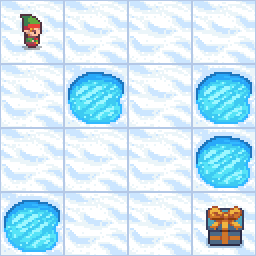

Agentımız 1(aşağı) yönüne gidecek

1 0.0 False False {'prob': 0.3333333333333333}


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
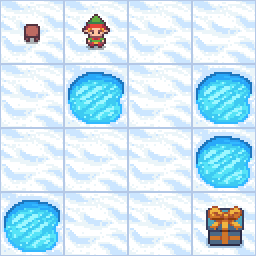

Agentımız 3(yukarı) yönüne gidecek

2 0.0 False False {'prob': 0.3333333333333333}


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
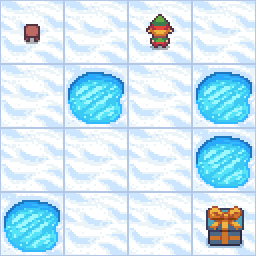

Agentımız 0(sol) yönüne gidecek

1 0.0 False False {'prob': 0.3333333333333333}


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
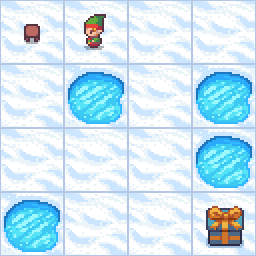

Agentımız 3(yukarı) yönüne gidecek

0 0.0 False False {'prob': 0.3333333333333333}


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
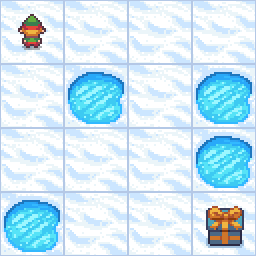

Agentımız 0(sol) yönüne gidecek

0 0.0 False False {'prob': 0.3333333333333333}


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
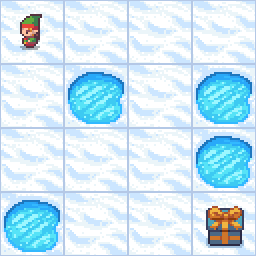

Agentımız 3(yukarı) yönüne gidecek

1 0.0 False False {'prob': 0.3333333333333333}


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
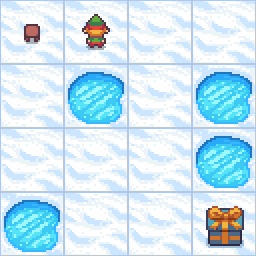

Agentımız 1(aşağı) yönüne gidecek

0 0.0 False False {'prob': 0.3333333333333333}


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
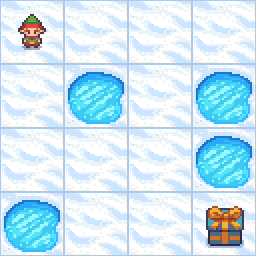

Agentımız 0(sol) yönüne gidecek

4 0.0 False False {'prob': 0.3333333333333333}


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
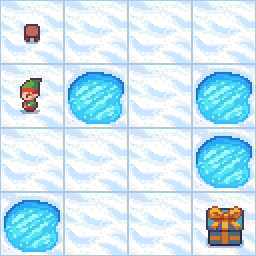

Agentımız 3(yukarı) yönüne gidecek

0 0.0 False False {'prob': 0.3333333333333333}


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
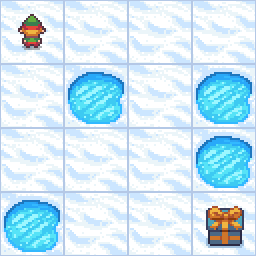

Agentımız 1(aşağı) yönüne gidecek

4 0.0 False False {'prob': 0.3333333333333333}


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
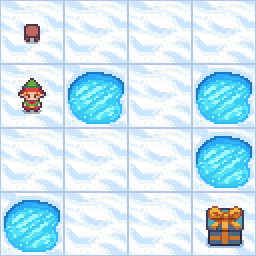

Agentımız 3(yukarı) yönüne gidecek

0 0.0 False False {'prob': 0.3333333333333333}


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
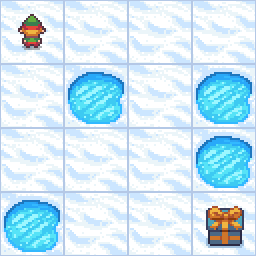

Agentımız 2(sağ) yönüne gidecek

1 0.0 False False {'prob': 0.3333333333333333}


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
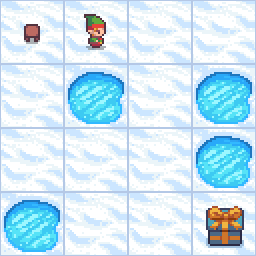

Agentımız 3(yukarı) yönüne gidecek

2 0.0 False False {'prob': 0.3333333333333333}


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
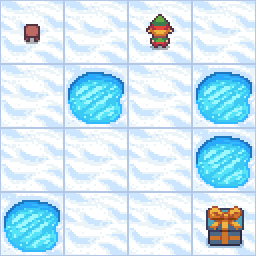

Agentımız 1(aşağı) yönüne gidecek

6 0.0 False False {'prob': 0.3333333333333333}


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
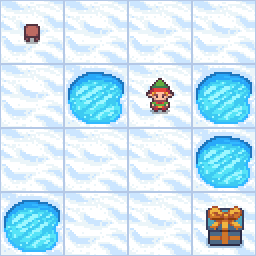

Agentımız 0(sol) yönüne gidecek

2 0.0 False False {'prob': 0.3333333333333333}


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
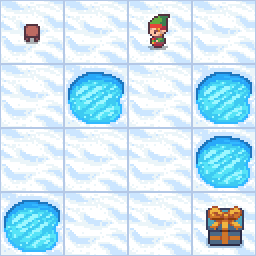

Agentımız 0(sol) yönüne gidecek

6 0.0 False False {'prob': 0.3333333333333333}


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
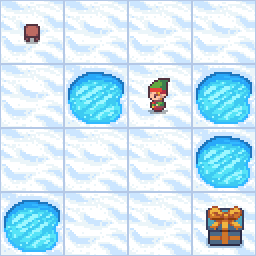

Agentımız 2(sağ) yönüne gidecek

2 0.0 False False {'prob': 0.3333333333333333}


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
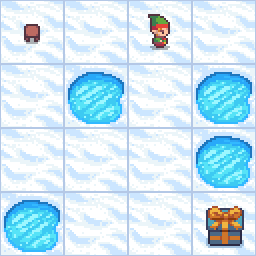

Agentımız 2(sağ) yönüne gidecek

6 0.0 False False {'prob': 0.3333333333333333}


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
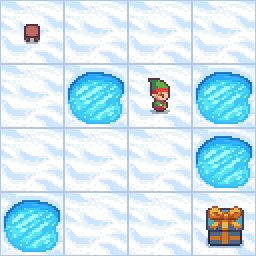

Agentımız 3(yukarı) yönüne gidecek

7 0.0 True False {'prob': 0.3333333333333333}


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
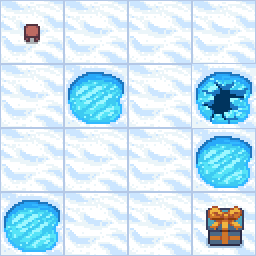

Agentımız toplam 20 hamle yaptı ve ödülü:0.0
time: 379 ms (started: 2025-04-06 11:12:18 +00:00)


In [ ]:
env.reset() #hücreyi tekrar tekrar çalıştırdığımızda baştan başlasın diye. agent 0,0 noktasına konumlanır.(Başka oyunlarda, varsa hareket eden diğer objeler de ilk anlarına getirilir. Gerektiğinde oyunun başlangıç yerleri değişken olabilir)
directions = {0:"sol", 1:"aşağı",2:"sağ",3:"yukarı"} #print ederken anlamlı bilgi basmak için
episode_over = False #oyunun sonlanıp sonlanmadığını gösteren değişken (termination:yani hedefe varır veya çatlağa düşürse)) veya maks hareket limitine ulaşırsa(truncated)
total_reward=0 #bu örnekte çok anlamlı değil, çünkü hedefe varmadığı sürece 0, hedefte 1 alacak, o yüzden kümülatif şekilde artan bir değer olmayacak ama RL'de geneleksel olarak kullanılan bir değişkendir, o geleneğe uyalım
steps=0 #toplam kaç hamle yapılmış, bunu tutacak
while not episode_over:
    action = env.action_space.sample()  # action space'den random bi hareket seçiyoruz, hiç öğrenilmiş bir bilgi kullanmıyoruz, davranış politikamız: rasgele bir eylem seçmek
    print(f"Agentımız {action}({directions[action]}) yönüne gidecek\n")
    observation, reward, terminated, truncated, info = env.step(action) #step metodu ile bu eylemi yerine getiriyoruz. step bize oyunun bitip bitmediğini veya belirlenen episode adımına geip gelmediğinizi de döndürüyor
    print(observation, reward, terminated, truncated, info)
    env.render()
    episode_over = terminated or truncated
    steps+=1
    total_reward+=reward

env.close()
print(f"Agentımız toplam {steps} hamle yaptı ve ödülü:{total_reward}")

Şimdi 10 kez oyanatalım ve her turun önemli bilgilerini listeleyelim.

In [ ]:
total_reward_list = []
for j in range(10):
    _ = env.reset()
    time_step = 0
    total_reward = 0

    while True:
        time_step += 1
        action = env.action_space.sample() #random bi action ürettik, 0-5 arasından bi değer üretecek
        state, reward, done, truncated, _ =  env.step(action) # state denen şey aslında next state. son paramenter info kullanmayacağı için _ diyebiliriz
        total_reward += reward

        if done or truncated:
            print(f"Episode: {j}, Timestep: {time_step}, Total Reward: {total_reward}, Sonuç: {'Başarılı' if state==15 else 'Hüsran'}")
            total_reward_list.append(total_reward)
            break


Episode: 0, Timestep: 4, Total Reward: 0.0, Sonuç: Hüsran
Episode: 1, Timestep: 7, Total Reward: 0.0, Sonuç: Hüsran
Episode: 2, Timestep: 7, Total Reward: 0.0, Sonuç: Hüsran
Episode: 3, Timestep: 3, Total Reward: 0.0, Sonuç: Hüsran
Episode: 4, Timestep: 7, Total Reward: 0.0, Sonuç: Hüsran
Episode: 5, Timestep: 4, Total Reward: 0.0, Sonuç: Hüsran
Episode: 6, Timestep: 5, Total Reward: 0.0, Sonuç: Hüsran
Episode: 7, Timestep: 8, Total Reward: 0.0, Sonuç: Hüsran
Episode: 8, Timestep: 16, Total Reward: 0.0, Sonuç: Hüsran
Episode: 9, Timestep: 8, Total Reward: 0.0, Sonuç: Hüsran
time: 5.31 ms (started: 2025-04-06 11:12:18 +00:00)


## Q-learning


Tanımımız neydi, hatırlayalım: Hangi durumda(state) hangi hareketi yapmak uzun vadede en çok ödülü getirir, bunu öğrenmeye çalışırız.

Yani bu environment'ta hedefe giden en kısa yolu çatlaklara(deliklere) düşmeden gitmeyi öğrenmemiz gerekiyor. Yani şu 3 alternatif yoldan birini öğrenmeliyiz.

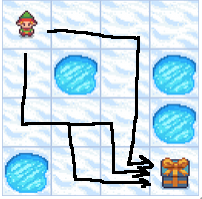

Denir ki, RL'de agentlar oyunu bilmez, kuralları bilmez, delik nedir, canavar nedir, top nedir v.s bilmez. Evet, birçok şeyi bilmediği doğru ama aslında oyunun ne olduğunu hiç bilmediği bence doğru değil, zira, aslında hedefin ne olduğunu değil ama hedef hücreye geldiğinde ne kadar ödül kazanacağını(keza delikler için de ceza) biliyor, bir nevi aslında ona oyunun kuralları verilmiş gibi düşünülebilir.

### Basit model

İlk yaklaşım, konuyu öğrenmemiz adına basit bir konfigürasyon içerecek. Q_table oluşturutken pure bellman eşitliğinden yararlanarak ilerleyeceğiz.

İnşa edeceğimiz Q_table medium yazısında gösterdiğimiz gibi bir numpy matris olacak. Bunu uzun vadede öğrenmek(stratejiyi oluşturmak) için binlerce kez(episode) oynayacağız. Bu, küçük bir environment olduğu için kodumuz hızlı çalışacaktır, o yüzden 50bin kez oynatabiliriz.

In [ ]:
#observation bilgsini 2 koordinatlı hücre bilgisine çevirecek olan bir decoder fonksiyon
def decode(state):
  row = state // 4
  col = state % 4
  return (row, col)

time: 1.15 ms (started: 2025-04-06 11:12:18 +00:00)


İlk olarak 5 tur atıp ekrana bazı bilgiler yazdırarak nasıl işlediğini göstereceğiz. Q_table'ın 0'lar dışında da bazı değerlere hızlıca ulaşması için de birkaç oynama yapacağız.

In [ ]:
env = gym.make('FrozenLake-v1', is_slippery=False, render_mode="rgb_array")
env._max_episode_steps=30
episode_number = 10

time: 2.21 ms (started: 2025-04-06 11:12:18 +00:00)


In [ ]:
q_table = np.zeros([env.observation_space.n,env.action_space.n]) #environment'ın action ve state space'ine göre başlangıç aşamasında 0'lardan oluşan bir Q table oluşturuyoruz
alpha = 0.5 # learning rate
gamma = 0.9 # discount ratio

for i in range(episode_number):
    state, info_initial = env.reset() # state=0 olarak başlar
    total_steps = 0 # hem deliğe düşme sayısı, hem yanlış(hedef olmayan) yere gelme sayısını tutacağız, her episodda sıfırlayacağız

    while True:
        # q-tableda o state'deki en büyük olan actionu alarak başlıyoruz, eğer max değer 0'sa(oyunu başlarında böyle olacak), random bir action seçelim
        if np.max(q_table[state]) > 0:
          action = np.argmax(q_table[state])
        else:
          action = env.action_space.sample()

        next_state, reward, terminated, truncated, _ = env.step(action) # bu aksiyonu icra ediyoruz, slipper olmadığnda info hep 1 olduğu için _

        print(f"{i}. episode'da {total_steps}. adımda '{directions[action]}' aksiyonu ile oluşan durum: next_state:{next_state}, yani {decode(next_state)}, reward: {reward}, terminated: {terminated}, truncated:{truncated}")

        # Q learning fonksiyonu
        old_value = q_table[state,action]
        next_max = np.max(q_table[next_state])

        next_value = (1-alpha)*old_value + alpha*(reward + gamma*next_max) #bellman fonksiyonu, formülü biraz farklı göstererek yazıyoruz, oldvalue iki tarafta da var ya, 1-alfa parantezine alıyoruz
        q_table[state,action] = next_value # Q table'ı update ediyoruz
        state = next_state # state'i update ediyoruz

        # yanlış hamle miktarınının izini sürmek için 1 artıralım
        if reward == 0:
            total_steps += 1

        if terminated and reward == 0:
          print(f"{i}. episodeda {total_steps} sonunda çatlağa düşme nedeniyle sonlandı*************************************\n")
          break
        elif terminated and reward==1:
          print(f"{i}. episodeda hedefe varma nedeniyle sonlandı***************************\n")
          break
        elif truncated:
          print(f"{i}. episodeda max hamle sayısına ulaşıldığı için sonlandı*******************************\n")
          break
        else:
          pass

0. episode'da 0. adımda 'yukarı' aksiyonu ile oluşan durum: next_state:0, yani (0, 0), reward: 0.0, terminated: False, truncated:False
0. episode'da 1. adımda 'aşağı' aksiyonu ile oluşan durum: next_state:4, yani (1, 0), reward: 0.0, terminated: False, truncated:False
0. episode'da 2. adımda 'sağ' aksiyonu ile oluşan durum: next_state:5, yani (1, 1), reward: 0.0, terminated: True, truncated:False
0. episodeda 3 sonunda çatlağa düşme nedeniyle sonlandı*************************************

1. episode'da 0. adımda 'sol' aksiyonu ile oluşan durum: next_state:0, yani (0, 0), reward: 0.0, terminated: False, truncated:False
1. episode'da 1. adımda 'sağ' aksiyonu ile oluşan durum: next_state:1, yani (0, 1), reward: 0.0, terminated: False, truncated:False
1. episode'da 2. adımda 'yukarı' aksiyonu ile oluşan durum: next_state:1, yani (0, 1), reward: 0.0, terminated: False, truncated:False
1. episode'da 3. adımda 'aşağı' aksiyonu ile oluşan durum: next_state:5, yani (1, 1), reward: 0.0, terminat

In [ ]:
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

time: 3.25 ms (started: 2025-04-06 11:12:18 +00:00)


### epipsode sayısı artırlmış model

In [ ]:
env = gym.make('FrozenLake-v1', is_slippery=False, render_mode="rgb_array")
episode_number = 5000

time: 1.38 ms (started: 2025-04-06 11:12:19 +00:00)


In [ ]:
q_table = np.zeros([env.observation_space.n,env.action_space.n])
alpha = 0.5
gamma = 0.9
reward_list = []
total_reward=0
outcomes=[]

for i in range(episode_number):
    state, info_initial = env.reset()
    outcomes.append("Failure")
    total_steps=0

    while True:
        if np.max(q_table[state]) > 0:
          action = np.argmax(q_table[state])
        else:
          action = env.action_space.sample()

        next_state, reward, terminated, truncated, _ = env.step(action)

        old_value = q_table[state,action]
        next_max = np.max(q_table[next_state])

        next_value = (1-alpha)*old_value + alpha*(reward + gamma*next_max)
        q_table[state,action] = next_value
        state = next_state

        total_steps+=1

        if reward:
          total_reward+=1
          outcomes[-1] = "Success"

        if terminated or truncated:
          break

    if i % 1000 == 0: #her 1000 turda bir ekrana yazdıralım
        reward_list.append(total_reward)
        print(f"{i}.episode sonunuda toplam ödül:{total_reward}, ilgili episodedaki adım sayısı:{total_steps}")

reward_list.append(total_reward)
print(f"Toplam {total_reward} kez oyun kazanıldı")
print("Nihai q-table:\n")
print(q_table)

0.episode sonunuda toplam ödül:0, ilgili episodedaki adım sayısı:10
1000.episode sonunuda toplam ödül:937, ilgili episodedaki adım sayısı:6
2000.episode sonunuda toplam ödül:1937, ilgili episodedaki adım sayısı:6
3000.episode sonunuda toplam ödül:2937, ilgili episodedaki adım sayısı:6
4000.episode sonunuda toplam ödül:3937, ilgili episodedaki adım sayısı:6
Toplam 4936 kez oyun kazanıldı
Nihai q-table:

[[0.      0.      0.59049 0.     ]
 [0.      0.      0.6561  0.     ]
 [0.      0.729   0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.81    0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.9     0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.39375 0.     ]
 [0.      0.      1.      0.     ]
 [0.      0.      0.      0.     ]]
time: 1.28 s (started: 2025-04-06

Görüldüğü üzere ilk 1000 oyun içinde öğrenme tamamlandı ve sonraki her 1000 oyunun hepsi kazanıldı. Bakalım tam ne zaman öğrenme gerçekleşmiş.

<Figure size 1200x500 with 0 Axes>

Text(0.5, 0, 'Run number')

Text(0, 0.5, 'Outcome')

<BarContainer object of 500 artists>

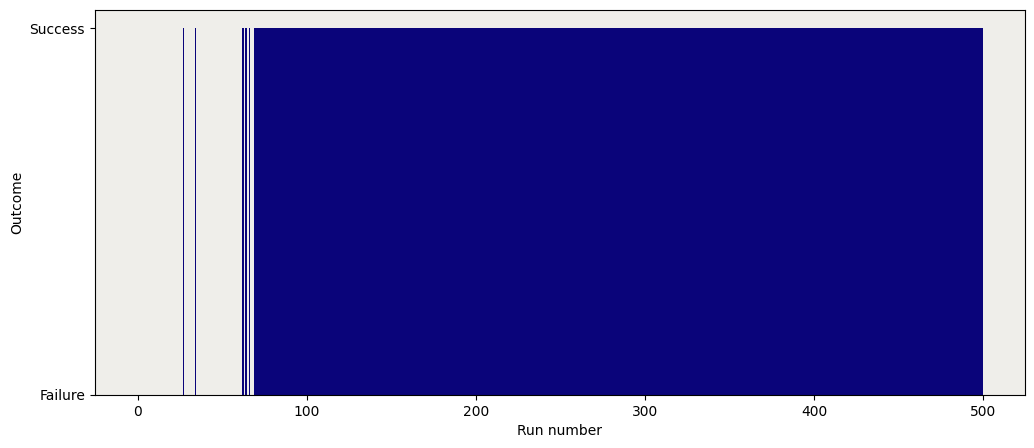

time: 1.36 s (started: 2025-04-06 11:12:20 +00:00)


In [ ]:
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(500), outcomes[:500], color="#0A047A", width=1.0)
plt.show()

70-80 civarından sonra öğrenme tamamlanmış gibi duruyor.

FrozenLake ortamını kaygan olmayacak şekilde (is_slippery=False) kurduysanız, hareketler tamamen deterministik olur. Bu durumda agent, her eylemi %100 doğrulukla gerçekleştirir (örneğin, "aşağı git" eylemi her zaman başarılı olur)
ve exploration (keşif) gerekmez, çünkü ortamda rastgelelik yoktur. Agent, Q-table'ı güncellerken direkt olarak optimal yolu bulabilir.

### slippery

Şimdi ortama biraz belirsizlik(stokastiklik) katalım.

#### Epsilonsuz

Yukaıdaki kodları aynen alalım sadece isslipery=True yapalım

In [ ]:
env = gym.make('FrozenLake-v1', is_slippery=True, render_mode="rgb_array")
episode_number = 5000

time: 2.45 ms (started: 2025-04-06 11:12:21 +00:00)


In [ ]:
q_table = np.zeros([env.observation_space.n,env.action_space.n])
alpha = 0.5
gamma = 0.9
reward_list = []
total_reward=0
outcomes=[]
succesful_step_list=[]

for i in range(episode_number):
    state, info_initial = env.reset()
    outcomes.append("Failure")
    total_steps=0

    while True:
        if np.max(q_table[state]) > 0:
          action = np.argmax(q_table[state])
        else:
          action = env.action_space.sample()

        next_state, reward, terminated, truncated, _ = env.step(action)
        old_value = q_table[state,action]
        next_max = np.max(q_table[next_state])

        next_value = (1-alpha)*old_value + alpha*(reward + gamma*next_max)
        q_table[state,action] = next_value #
        state = next_state
        total_steps+=1

        if reward:
          total_reward+=1
          outcomes[-1] = "Success"
          succesful_step_list.append(total_steps)

        if terminated or truncated:
          break


    if i % 1000 == 0:
        reward_list.append(total_reward)
        print(f"{i}.episode sonunuda toplam ödül:{total_reward}")

reward_list.append(total_reward)
print(f"Toplam {total_reward} kez oyun kazanıldı")
#başarılı oyunların çeşitli istatistiklerini de yazdıralım
print(f"Succesful steps mean: {np.mean(succesful_step_list)}")
print(f"Succesful steps min: {np.min(succesful_step_list)}")
print(f"Succesful steps max: {np.max(succesful_step_list)}")

print("Nihai q-table:\n")
print(q_table)

0.episode sonunuda toplam ödül:0
1000.episode sonunuda toplam ödül:18
2000.episode sonunuda toplam ödül:31
3000.episode sonunuda toplam ödül:49
4000.episode sonunuda toplam ödül:66
Toplam 82 kez oyun kazanıldı
Succesful steps mean: 12.024390243902438
Succesful steps min: 6
Succesful steps max: 34
Nihai q-table:

[[0.00000000e+00 0.00000000e+00 1.06109345e-03 0.00000000e+00]
 [4.00748871e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.10213759e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.88533620e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.89043180e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11395381e-02]
 [0.00000000e+00 0.00000000e+00 1.23010627e-01 0.00000000e+00]
 [4.43080199e-01 0.00000000e+00 0.00000000e+00 0.0000000

Görüldüğü üzere oyuna kayganlık katılınca işler değişti ve ortalama adım sayısı artmış oldu.

<Figure size 1200x500 with 0 Axes>

Text(0.5, 0, 'Run number')

Text(0, 0.5, 'Outcome')

<BarContainer object of 500 artists>

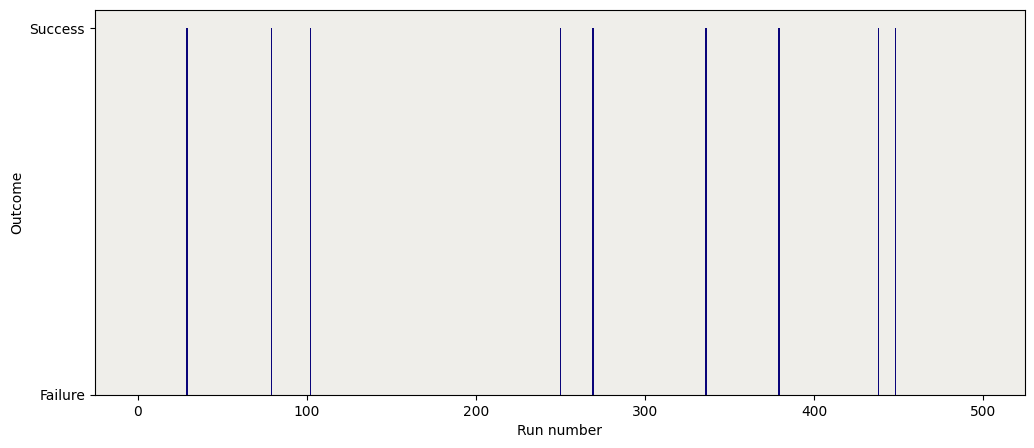

time: 1.74 s (started: 2025-04-06 11:12:24 +00:00)


In [ ]:
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(500), outcomes[:500], color="#0A047A", width=1.0)
plt.show()

Şimdi bir de keşfetme yeteneği katalım.

#### Epsilon stretejisi

Biliyoruz ki üç farklı ideal yol varken stokastiklik sayesinde birçok ihtimal daha ortaya çıkar, mesela kırmızı yoldan öğrenmiş olabilir. O yüzden agent'ın gittiği yola rasgelelik katmak adına epsilon staretejisi uyugularız.

Medium yazımda ne dediğimizi hatırlayalım: Q-Learning, off-policy bir algoritmadır demiştik. Bu, veri toplamak için kullanılan davranış politikası (behavior policy) ile öğrenilen politika (target policy) arasında ayrım olduğu anlamına gelir. İşte epislon bizim Davranış Politikamız olacak: Ör: Agent, %90 ihtimalle en yüksek Q-değerine sahip eylemi seçsin (exploit), %10 rastgele eylem seçsin (explore) isteyebiliriz.
Hedef Politikamız ise Q-table'dan en yüksek değeri seçmek.

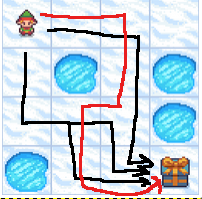

In [ ]:
env = gym.make('FrozenLake-v1', is_slippery=False, render_mode="rgb_array")
episode_number = 5000
epsilon = 0.1

time: 1.73 ms (started: 2025-04-06 11:12:26 +00:00)


In [ ]:
q_table = np.zeros([env.observation_space.n,env.action_space.n])
alpha = 0.5
gamma = 0.9
reward_list = []
total_reward=0
outcomes=[]
succesful_step_list=[]

for i in range(episode_number):
    state, info_initial = env.reset()
    outcomes.append("Failure")
    total_steps=0

    while True:
        if np.max(q_table[state]) > 0:
          if np.random.rand() < epsilon: # %10 olasılıkla random action seçelim
              action = env.action_space.sample()
          else:
              action = np.argmax(q_table[state])
        else:
          action = env.action_space.sample()

        next_state, reward, terminated, truncated, _ = env.step(action)
        old_value = q_table[state,action]
        next_max = np.max(q_table[next_state])

        next_value = (1-alpha)*old_value + alpha*(reward + gamma*next_max)
        q_table[state,action] = next_value
        state = next_state
        total_steps+=1

        if reward:
          total_reward+=1
          outcomes[-1] = "Success"
          succesful_step_list.append(total_steps)

        if terminated or truncated:
          break


    if i % 1000 == 0:
        reward_list.append(total_reward)
        print(f"{i}.episode sonunuda toplam ödül:{total_reward}")

reward_list.append(total_reward)
print(f"Toplam {total_reward} kez oyun kazanıldı")
print(f"Succesful steps mean: {np.mean(succesful_step_list)}")
print(f"Succesful steps min: {np.min(succesful_step_list)}")
print(f"Succesful steps max: {np.max(succesful_step_list)}")

print("Nihai q-table:\n")
print(q_table)

0.episode sonunuda toplam ödül:0
1000.episode sonunuda toplam ödül:663
2000.episode sonunuda toplam ödül:1556
3000.episode sonunuda toplam ödül:2447
4000.episode sonunuda toplam ödül:3344
Toplam 4235 kez oyun kazanıldı
Succesful steps mean: 6.622668240850059
Succesful steps min: 6
Succesful steps max: 41
Nihai q-table:

[[0.531441   0.4782969  0.59049    0.531441  ]
 [0.531441   0.         0.6561     0.59049   ]
 [0.59049    0.729      0.59049    0.6561    ]
 [0.6561     0.         0.55354833 0.58126331]
 [0.41850979 0.24213768 0.         0.531441  ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.         0.6561    ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.46335008]
 [0.28249399 0.81       0.6075     0.        ]
 [0.729      0.9        0.         0.729     ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.80367187 0.9        0.54675   ]
 [0.81       0.9    

<Figure size 1200x500 with 0 Axes>

Text(0.5, 0, 'Run number')

Text(0, 0.5, 'Outcome')

<BarContainer object of 500 artists>

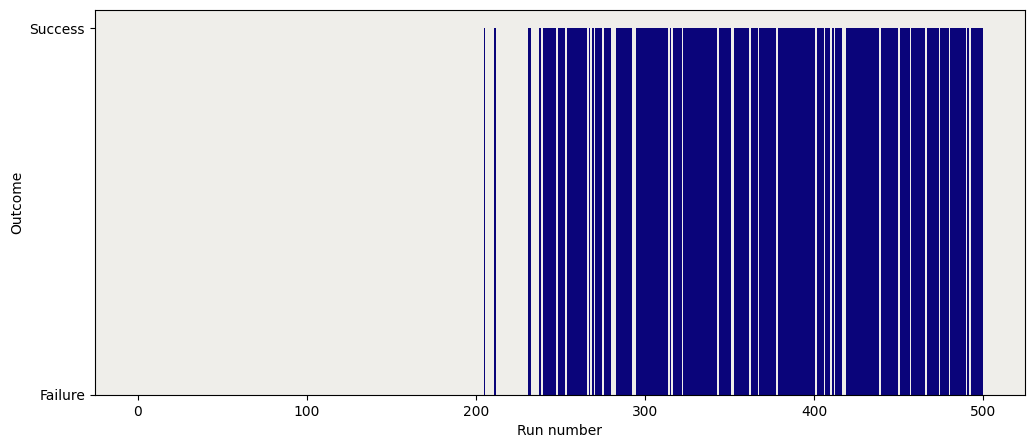

time: 3.37 s (started: 2025-04-06 11:12:28 +00:00)


In [ ]:
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(500), outcomes[:500], color="#0A047A", width=1.0)
plt.show()

Görüldüğü üzere epsilon katınca çok daha iyi oldu, hatta nerdeyse slippery olmayan duruma epey yaklaştı.

Bu noktada, epsilon, alpha, gamma değerleriyle oynayarak(grid search yaparak) hyperparametre-tuning ediliebilir. Ayrıca episode sayısı da artırılarak ilave iyileşmeler de sağlanabilir. Bu işi size bırakıyorum.

#### Ödül programını değiştirme

Mevcut environment için hedef varmak 1, diğer durumlarda hep 0 alıyoruz. Biz bunu farklılaştırabiliriz, medium yazımda da böyle bir örnek vermiştim. Diyelim ki, deliklere düşersek -10, hedefe gelirsek +10, diğer hücrelere adım atarsak -1 olsun, yani gölde boş boş dolanmayı da cezalandıralım. Bunun için mevcut step metodundan dönen ödül bilgisini ezecek bir fonksiyon hazırlayalım.

In [ ]:
delikler=[5,7,11,12]
def recalculate_reward(reward, state):
    if reward == 0:
        if state in delikler:
          return -10
        else:
          return -1
    else:
        return 10

time: 1.49 ms (started: 2025-04-06 11:13:10 +00:00)


In [ ]:
env = gym.make('FrozenLake-v1', is_slippery=False, render_mode="rgb_array")
episode_number = 5000
epsilon = 0.1

time: 2 ms (started: 2025-04-06 11:13:10 +00:00)


In [ ]:
q_table = np.zeros([env.observation_space.n,env.action_space.n])
alpha = 0.5
gamma = 0.9
reward_list = []
total_reward=0
outcomes=[]
succesful_step_list=[]

for i in range(episode_number):
    state, info_initial = env.reset()
    outcomes.append("Failure")
    total_steps=0

    while True:
        if np.max(q_table[state]) > 0:
          if np.random.rand() < epsilon:
              action = env.action_space.sample()
          else:
              action = np.argmax(q_table[state])
        else:
          action = env.action_space.sample()

        next_state, reward, terminated, truncated, _ = env.step(action)
        reward = recalculate_reward(reward, state) #override ediyoruz

        old_value = q_table[state,action]
        next_max = np.max(q_table[next_state])

        next_value = (1-alpha)*old_value + alpha*(reward + gamma*next_max)
        q_table[state,action] = next_value
        state = next_state
        total_steps+=1

        if reward==10:
          total_reward+=10
          outcomes[-1] = "Success"
          succesful_step_list.append(total_steps)

        if terminated or truncated:
          break


    if i % 1000 == 0:
        reward_list.append(total_reward)
        print(f"{i}.episode sonunuda toplam ödül:{total_reward}")

reward_list.append(total_reward)
print(f"Toplam {int(total_reward/10)} kez oyun kazanıldı")
print(f"Succesful steps mean: {np.mean(succesful_step_list)}")
print(f"Succesful steps min: {np.min(succesful_step_list)}")
print(f"Succesful steps max: {np.max(succesful_step_list)}")

print("Nihai q-table:\n")
print(q_table)

0.episode sonunuda toplam ödül:0
1000.episode sonunuda toplam ödül:8270
2000.episode sonunuda toplam ödül:17120
3000.episode sonunuda toplam ödül:25940
4000.episode sonunuda toplam ödül:34820
Toplam 4376 kez oyun kazanıldı
Succesful steps mean: 6.567870201096892
Succesful steps min: 6
Succesful steps max: 29
Nihai q-table:

[[ 0.62882     1.8098     -0.434062    0.62882   ]
 [ 0.62882    -1.         -1.86309332 -0.44551482]
 [-0.57256345 -1.66696777 -1.81867065 -1.79662148]
 [-1.59229355 -0.96875    -1.64765625 -1.85855103]
 [ 1.8098      3.122      -1.          0.62882   ]
 [ 0.          0.          0.          0.        ]
 [-0.99609375 -0.75       -0.875      -1.67901095]
 [ 0.          0.          0.          0.        ]
 [ 3.122      -1.          4.58        1.8098    ]
 [ 3.122       6.2         6.2        -1.        ]
 [ 4.58        8.         -0.9921875  -1.64882813]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [-1.      

**Sonuç**: Çok büyük bir kazanım olmadıaam olabilrdi de. Diğer parametrelerle de oynayarak ilave iyileştirmeler sağlaanbilir.

**Ek öneriler**

- Epsilon Decay: Eğitim ilerledikçe epsilon değerini azaltarak başta keşif (exploration), sonra sömürü (exploitation) ağırlıklı politika uygulanabilir.

  `epsilon = max(0.01, epsilon * 0.995)  # Her episode'da epsilon'ı azaltma`

- Ödül Mühendisliği: Hedefe ulaşma dışında ara ödüller ekleyerek öğrenmeyi hızlandırabilirsiniz (örneğin, hedefe yaklaştıkça artan ödül uygulanabilir).

- Hyperparameter Tuning: alpha ve gamma değerlerini grid search ile optimize edilebilir

### Modeli kaydetme ve sıfırdan oynama

[Şimdi biz bu modeli yaptık da nerde kullanacağız, nasıl kullanacağız?](https://www.youtube.com/watch?v=0aNu1_ZmXu8)

Bu tür RL modellerini kaydederek istediğimzi zaman oynatabilir. Mesela hayali bir frozen lake yarışması düşünelim, o yauışmaya bu modelimizi sokabiliriz. Böylece en kısa sürede hedefe ulaşan model yarışmayı kazanacaktır. (Ya da başak bir yarışamda en çok puan alan model)

Bunun için modelimizi joblib / pickle modüllerini kullanarak diske kaydederiz. Veya elimizdeki mpdel bir q-table matrisi olduğu için doğrudan numpy'ın save metodunu da kullanabiliriz.

In [ ]:
np.save('q_table.npy', q_table)

time: 1.95 ms (started: 2025-04-06 11:13:13 +00:00)


Sonra bu modeli istediğimiz yerde istediğimiz zaman diskten okuyup kullanaibliriz.

Agentımız 1(aşağı) yönüne gidecek

4 0.0 False False {'prob': 1.0}


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
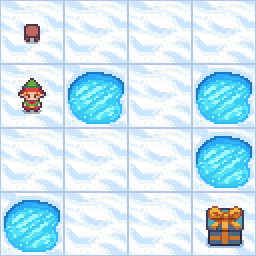

Agentımız 1(aşağı) yönüne gidecek

8 0.0 False False {'prob': 1.0}


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
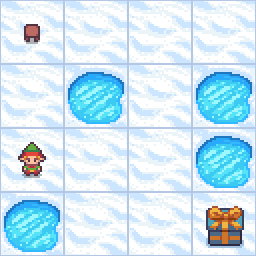

Agentımız 2(sağ) yönüne gidecek

9 0.0 False False {'prob': 1.0}


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
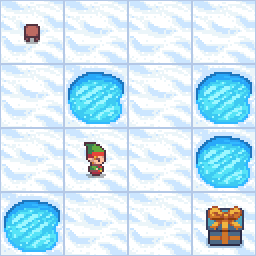

Agentımız 1(aşağı) yönüne gidecek

13 0.0 False False {'prob': 1.0}


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
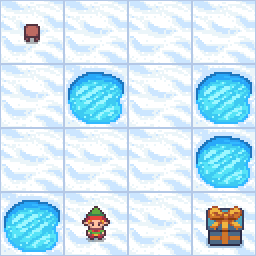

Agentımız 2(sağ) yönüne gidecek

14 0.0 False False {'prob': 1.0}


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
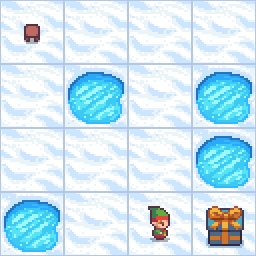

Agentımız 2(sağ) yönüne gidecek

15 1.0 True False {'prob': 1.0}


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
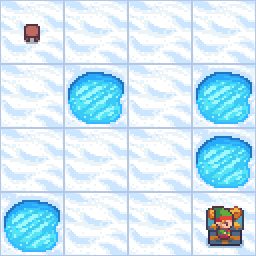

Agentımız toplam 6 hamle yaptı ve ödülü:1.0
time: 208 ms (started: 2025-04-06 12:08:13 +00:00)


In [ ]:
state, _ = env.reset()
directions = {0:"sol", 1:"aşağı",2:"sağ",3:"yukarı"}
episode_over = False
total_reward=0
steps=0
q_table = np.load('q_table.npy')
while not episode_over:
    action = np.argmax(q_table[state])
    print(f"Agentımız {action}({directions[action]}) yönüne gidecek\n")
    state, reward, terminated, truncated, info = env.step(action)
    print(state, reward, terminated, truncated, info)
    env.render()
    episode_over = terminated or truncated
    steps+=1
    total_reward+=reward

print(f"Agentımız toplam {steps} hamle yaptı ve ödülü:{total_reward}")
env.close()

Q-table'ın güzellği, sadece başlangıç hücresinde oyuna nasıl başlarız'ın cevabını vermesi değil, herhangi bir hücredeyken bile doğru yolu verebilir olması. Yani agent'mızı üç boyutlu hale getirilmiş bu oyunda, 80*80 yapıldığında dahi, helikopeterle herhangi bir alana bıraksak, oradan nereye gideceğini iyi bilecektir.

(1, 0.0, False, False, {'prob': 1.0})

(2, 0.0, False, False, {'prob': 1.0})

(6, 0.0, False, False, {'prob': 1.0})

Agentımız 1(aşağı) yönüne gidecek

10 0.0 False False {'prob': 1.0}


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
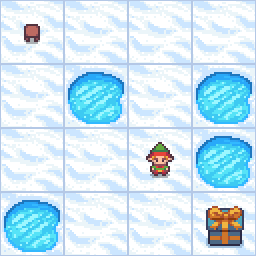

Agentımız 1(aşağı) yönüne gidecek

14 0.0 False False {'prob': 1.0}


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
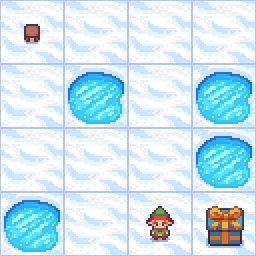

Agentımız 2(sağ) yönüne gidecek

15 1.0 True False {'prob': 1.0}


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
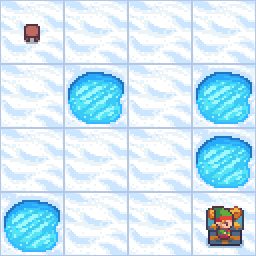

Agentımız toplam 3 hamle yaptı ve ödülü:1.0
time: 62.7 ms (started: 2025-04-06 12:13:21 +00:00)


In [ ]:
# orta noktadan bırakılması durumu: direkt oradan başlayamıyor, biz manuel getirip öyle devam ettireceğiz
state, _ = env.reset() #0,0'da
env.step(2) #0,1
env.step(2) #0,2
env.step(1) #1,2

#şimdi biz buradan devam edelim
directions = {0:"sol", 1:"aşağı",2:"sağ",3:"yukarı"}
episode_over = False
total_reward=0
steps=0
q_table = np.load('q_table.npy')
while not episode_over:
    action = np.argmax(q_table[state])
    print(f"Agentımız {action}({directions[action]}) yönüne gidecek\n")
    state, reward, terminated, truncated, info = env.step(action)
    print(state, reward, terminated, truncated, info)
    env.render()
    episode_over = terminated or truncated
    steps+=1
    total_reward+=reward

print(f"Agentımız toplam {steps} hamle yaptı ve ödülü:{total_reward}")
env.close()